In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from musicalrobot import irtemp
from musicalrobot import edge_detection as ed
from musicalrobot import pixel_analysis as pa

In [3]:
# Inputting the video as a stack of arrays
frames = ed.input_file('../musicalrobot/data/10_17_19_PPA_Shallow_plate.tiff')

In [4]:
len(frames)

887

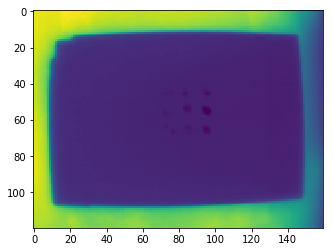

In [5]:
plt.imshow(frames[515])

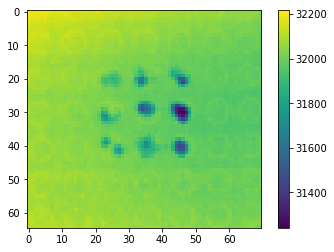

In [6]:
# Cropping all the frames in the video
crop_frame = []
for frame in frames:
    crop_frame.append(frame[25:90,50:120])
plt.imshow(crop_frame[515])
plt.colorbar()

In [7]:
# Performing Image equalization to determine sample position
img_eq = pa.image_eq(len(crop_frame), crop_frame)

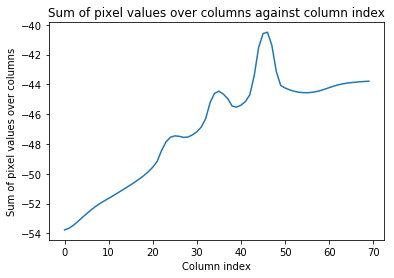

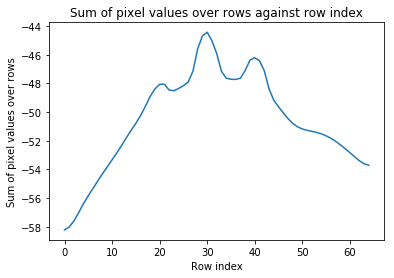

In [8]:
# Determining the sum of pixels in each column and row
column_sum, row_sum = pa.pixel_sum(img_eq)

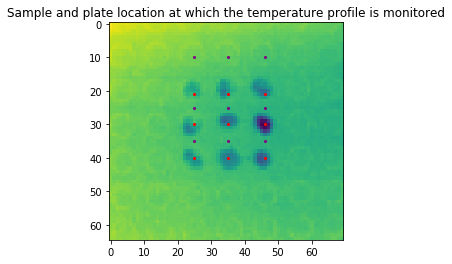

In [9]:
# Determining the plate and sample locations
r_peaks, c_peaks = pa.peak_values(column_sum, row_sum, 3, 3, img_eq)
sample_location = pa.locations(r_peaks, c_peaks, img_eq)

In [10]:
r_peaks

[21, 30, 40]

In [11]:
c_peaks

[25, 35, 46]

In [12]:
sample_location

,Row,Column,plate_location
0,21,25,10
1,30,25,25
2,40,25,35
3,21,35,10
4,30,35,25
5,40,35,35
6,21,46,10
7,30,46,25
8,40,46,35


In [14]:
# Extracting temperature profiles at all the sample and plate locations
temp, plate_temp = pa.pixel_intensity(sample_location, crop_frame, 'Row', 'Column', 'plate_location')

In [15]:
# Uncomment the following block of code to save the temperature profile of the samples as a pickle
# import pickle
# with open('ppa_temp.pkl','wb') as f:
#     pickle.dump(temp, f)
# Uncomment the following block of code to save the temperature profile data of the plate locations as a pickle
# import pickle
# with open('ppa_plate_temp.pkl','wb') as f:
#     pickle.dump(plate_temp, f)

In [16]:
# Finding inflection temperature
s_peaks, s_infl = ed.peak_detection(temp, plate_temp, 'Sample')
p_peaks, p_infl = ed.peak_detection(temp, plate_temp, 'Plate')
inf_temp = ed.inflection_point(temp, plate_temp, s_peaks, p_peaks)

/Users/shrilakshmisbonageri/miniconda3/envs/image/lib/python3.6/site-packages/musicalrobot/edge_detection.py:293: RuntimeWarning: invalid value encountered in true_divide
  derivative = gradient[:,1]/gradient[:,0]


In [17]:
inf_temp

[45.2, 45.93, 45.34, 43.07, 41.04, 43.9, 40.86, 39.27, 40.99]

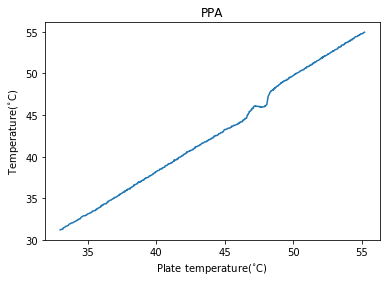

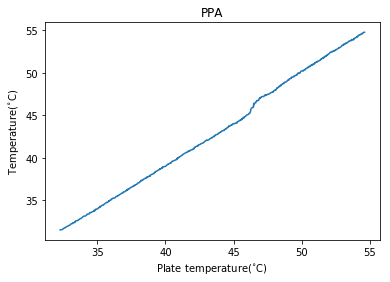

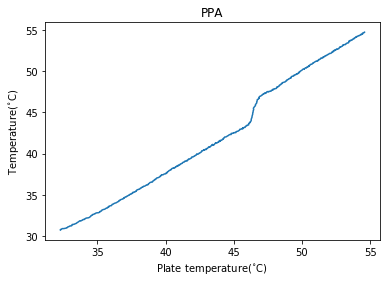

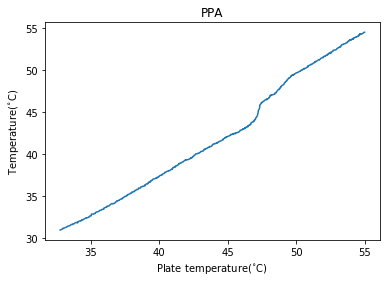

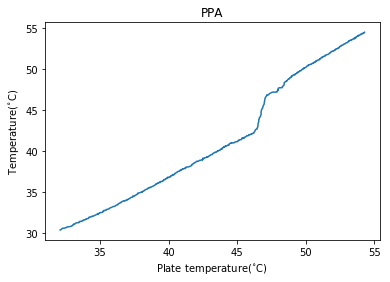

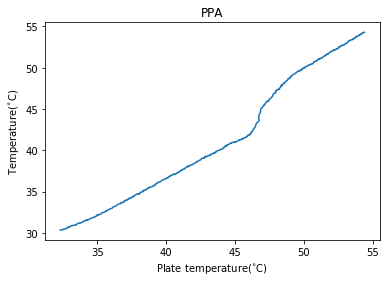

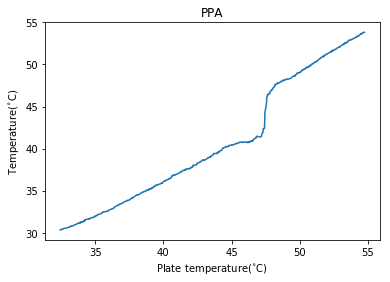

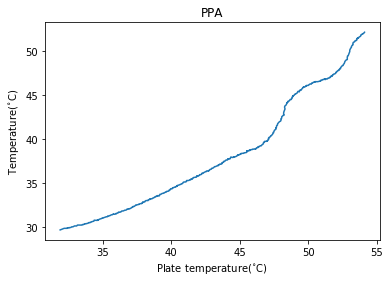

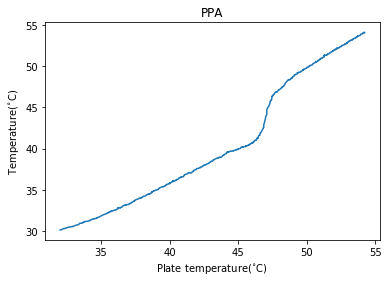

In [18]:
# Plotting temperature profiles
for i in range(len(temp)):
    plt.plot(plate_temp[i], temp[i])
    plt.title('PPA')
    plt.xlabel('Plate temperature($^{\circ}$C)')
    plt.ylabel('Temperature($^{\circ}$C)')
#     plt.savefig('../temp_profiles/ppa_'+ str(i+1)+ '.png')
    plt.show()